In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import utils
import models
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA, KernelPCA
from torchsummary import summary
import matplotlib.patches as mpatches
from matplotlib.cm import get_cmap

In [2]:
train_dataset = utils.dataset_with_indices(torchvision.datasets.FashionMNIST)(root='mnist', train=True, transform=torchvision.transforms.ToTensor())
test_dataset = utils.dataset_with_indices(torchvision.datasets.FashionMNIST)(root='mnist', train=False, transform=torchvision.transforms.ToTensor())

In [3]:
raw_train_embedding = train_dataset.data.reshape(train_dataset.data.shape[0], 28*28)
raw_test_embedding = test_dataset.data.reshape(test_dataset.data.shape[0], 28*28)

In [5]:
triplet_model = models.Network()
triplet_model.load_state_dict(torch.load('trained_models/triplet_margin_1'))
triplet_train_embedding, triplet_test_embedding = utils.embed_regular(triplet_model, train_dataset, test_dataset)

In [6]:
self_supcon_model = models.Network()
self_supcon_model.load_state_dict(torch.load('trained_models/n_tuple_temp_0_1'))
self_supcon_train_embedding, self_supcon_test_embedding = utils.embed_regular(self_supcon_model, train_dataset, test_dataset)

In [8]:
supcon_model = models.Network()
supcon_model.load_state_dict(torch.load('trained_models/sup_con_temp_0_1'))
supcon_train_embedding, supcon_test_embedding = utils.embed_forward(supcon_model, train_dataset, test_dataset)

In [9]:
raw_pca = PCA(n_components=2).fit(raw_train_embedding)
raw_pca_embedding = raw_pca.transform(raw_test_embedding)

triplet_pca = PCA(n_components=2).fit(triplet_train_embedding)
triplet_pca_embedding = triplet_pca.transform(triplet_test_embedding)

self_supcon_pca = PCA(n_components=2).fit(self_supcon_train_embedding)
self_supcon_pca_embedding = self_supcon_pca.transform(self_supcon_test_embedding)

supcon_pca = PCA(n_components=2).fit(supcon_train_embedding)
supcon_pca_embedding = supcon_pca.transform(supcon_test_embedding)

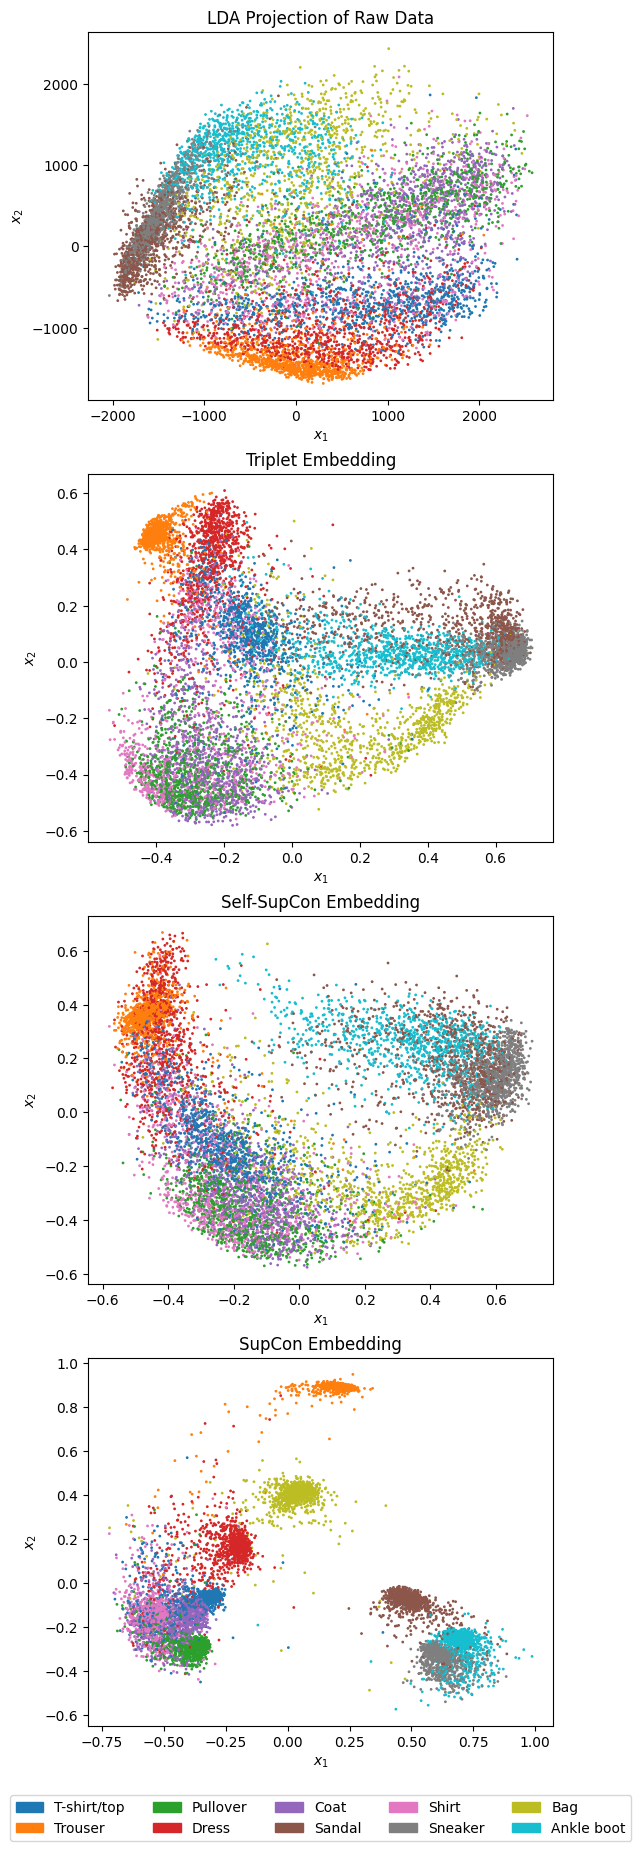

In [13]:
fig, axs = plt.subplots(4, figsize=(6, 22)) #figsize=(6, 10)
ax1 = axs[0]
ax2 = axs[1]
ax3 = axs[2]
ax4 = axs[3]

# plot 1
ax1.set_title('Raw Data')
ax1.scatter(raw_pca_embedding[:,0], raw_pca_embedding[:,1], c=test_dataset.targets, cmap='tab10', s=1)
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')
ax1.set_title('LDA Projection of Raw Data')

# plot 2
ax2.set_title('Triplet Embedding')
ax2.scatter(triplet_pca_embedding[:,0], triplet_pca_embedding[:,1], c=test_dataset.targets, cmap='tab10', s=1)
ax2.set_xlabel('$x_1$')
ax2.set_ylabel('$x_2$')

# plot 3
ax3.set_title('Self-SupCon Embedding')
ax3.scatter(self_supcon_pca_embedding[:,0], self_supcon_pca_embedding[:,1], c=test_dataset.targets, cmap='tab10', s=1)
ax3.set_xlabel('$x_1$')
ax3.set_ylabel('$x_2$')

# plot 4
ax4.set_title('SupCon Embedding')
ax4.scatter(supcon_pca_embedding[:,0], supcon_pca_embedding[:,1], c=test_dataset.targets, cmap='tab10', s=1)
ax4.set_xlabel('$x_1$')
ax4.set_ylabel('$x_2$')

patches = []
num_classes = len(train_dataset.classes)
for i in range(num_classes):
    patches.append(mpatches.Patch(color=get_cmap('tab10')(i/(num_classes-1)), label=train_dataset.classes[i]))
plt.legend(handles=patches, loc='center', bbox_to_anchor=(0.5, -0.25), ncol=5)
plt.show()